In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

transfer learning vgg16, resnet50, inception

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
training_dir = 'split/train'

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range = 40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(training_dir,
                                                   batch_size=25,
                                                   target_size=(150,150))

test_dir = 'split/test'

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 batch_size=25,
                                                 target_size=(150,150))

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 148625 images belonging to 3 classes.
Found 37158 images belonging to 3 classes.


In [10]:
history = model.fit(train_generator,
                             epochs=30,
                             validation_data=test_generator,
                             callbacks=[checkpoint])

Epoch 1/30
2973/2973 [==============================] - 7174s 2s/step - loss: 0.2025 - acc: 0.9208 - val_loss: 0.0785 - val_acc: 0.9710
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/30
2973/2973 [==============================] - 7086s 2s/step - loss: 0.1185 - acc: 0.9565 - val_loss: 0.0604 - val_acc: 0.9773
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/30
2973/2973 [==============================] - 6952s 2s/step - loss: 0.0892 - acc: 0.9689 - val_loss: 0.0597 - val_acc: 0.9798
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/30
2973/2973 [==============================] - 6949s 2s/step - loss: 0.0735 - acc: 0.9743 - val_loss: 0.1888 - val_acc: 0.9429
Epoch 5/30
2973/2973 [==============================] - 6952s 2s/step - loss: 0.0657 - acc: 0.9777 - val_loss: 0.0646 - val_acc: 0.9745
Epoch 6/30
2973/2973 [==============================] - 6985s 2s/step - loss: 0.0620 - acc: 0.9785 - val_loss: 0.1017 - val_acc: 0.9636
Epoch 7/30

In [12]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


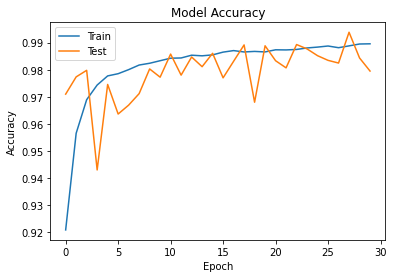

In [18]:
## Summarize accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.savefig('model_acc.png', dpi=200, format='png')

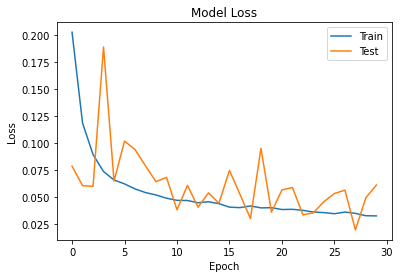

In [17]:
## Summarize loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.savefig('model_loss.png', dpi=200, format='png')